In [12]:
%load_ext autoreload
%autoreload 2

# init and load image

In [14]:


import os
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/ImageSpot')
# import bokeh

import numpy as np 
from bokeh.plotting import show, output_notebook
import pandas as pd
import socket
import jupyter_annotator_0_1_0 as ja

output_notebook()

# from bokeh.plotting import figure, output_notebook, show


Loading BokehJS ...

## define regions in the image and desiered colord to use for annotations

In [15]:
anno_order = ['Fiducials',
              'Artifacts',
              'Background',
              'Medulla',
              'Cortex',
              'Edge',
              'Vessels',
             ]
anno_colors = ['black',
               'red',
               'green',
               'yellow',
               'cyan',
               'brown',
               'blue',
              ]

## scribble iniital annotations

In [16]:
im = ja.read_hne('/nfs/team205/ny1/playground/Jupyter_annotator/Segment_image.png')
p, render_dict = ja.scribbler(im,anno_order,anno_colors)

def app(doc):
    global p
    doc.add_root(p)
    
host = '5011' 
import socket
show(app,notebook_url=f'{socket.gethostname()}:'+host) # determine if working on a server or local environment, if working on a local pc - 'local', while working on server instance indicate the port number e.g. 5011 (string)
print('wait for it.. can take a few seconds...')

wait for it.. can take a few seconds...


In [17]:
training_labels = ja.scribble_to_labels(im,render_dict)

Fiducials
Artifacts
Background
Medulla
Cortex
Edge
Vessels


## plot scribble anotations  

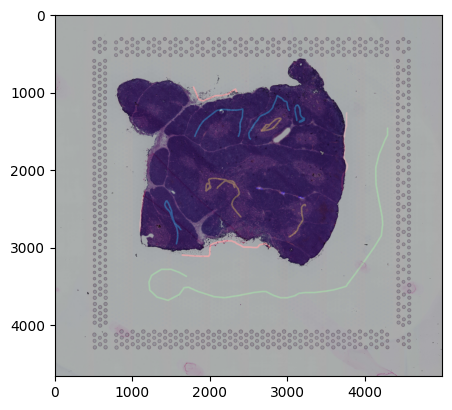

In [23]:
training_labels_rgb = ja.rgb_from_labels(training_labels,colors=anno_colors)
ja.overlay_lebels(im,training_labels_rgb,alpha=0.75)

## run the RF classifier 

In [19]:
# %%time
# this step takes about 1 to 5 min depending on number of training areas and resolution  
result = ja.sk_rf_classifier(im,training_labels)

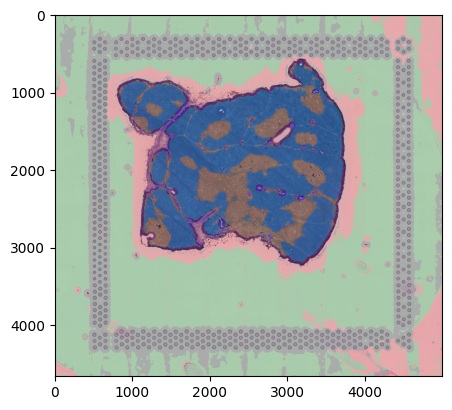

In [30]:
# plot result 
result_rgb = ja.rgb_from_labels(result,colors=anno_colors)
out_img = ja.overlay_lebels(im,result_rgb,alpha=0.75)

## Correct forest annotations 

In [45]:
tabs,render_dict = ja.annotator(im,out_img,anno_order,anno_colors)

# plotting
def app(doc):
    global tabs
    doc.add_root(tabs)
show(app,notebook_url=f'{socket.gethostname()}:5011')

## update annotations 

In [44]:
out_img, result = ja.update_annotator(im,result,anno_colors,render_dict)


Artifacts
Background
Cortex
